## **Dataset: -** It is given by Kaggle from UCI Machine Learning Repository, in one of its challenges. It is a dataset of Breast Cancer patients with Malignant and Benign tumor. K-nearest neighbour algorithm is used to predict whether is patient is having cancer (Malignant tumour) or not (Benign tumour).

In [25]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# drop column 'id' and 'Unnamed: 32'
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.shape



(569, 31)

In [5]:
# Check the 'diagnosis' column
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [6]:
# Convert 'diagnosis' value to binary value
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df['diagnosis'].dtype

dtype('int64')

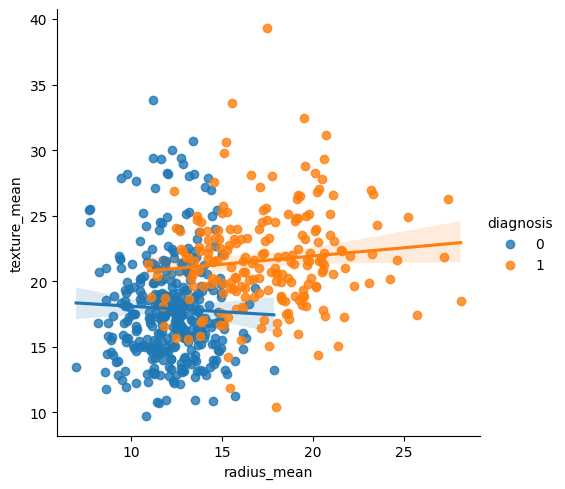

In [9]:
# Built lmplot for between 'radius mean' and 'texture mean' with hue as 'diagnosis'
sns.lmplot(x='radius_mean', y='texture_mean', data=df, hue='diagnosis')

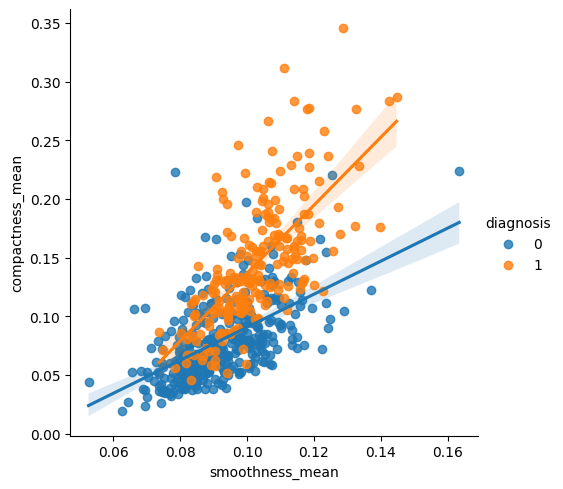

In [10]:
# Built lmplot for between 'smoothness_mean' and 'compactness_mean' with hue as 'diagnosis'
sns.lmplot(x='smoothness_mean', y='compactness_mean', data=df, hue='diagnosis')


In [11]:
# Split the data into X, y with diagnosis as target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [33]:
# Split the data into training and testing part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# use sklearn to apply KNN with n neighbors as 13
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [35]:
# Print accuracy score of KNN model
print("Accuracy of the KNN model is: ", knn.score(X_test, y_test)*100)

Accuracy of the KNN model is:  97.36842105263158


In [16]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

In [21]:
# Perform cross validation with 10 folds and store the value in array as neighbors with cv score value
neighbors = np.arange(1, 50, 2)
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


In [22]:
MSE = [1-x for x in cv_scores]

In [23]:
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is {}".format(optimal_k))

The optimal number of neighbors is 3


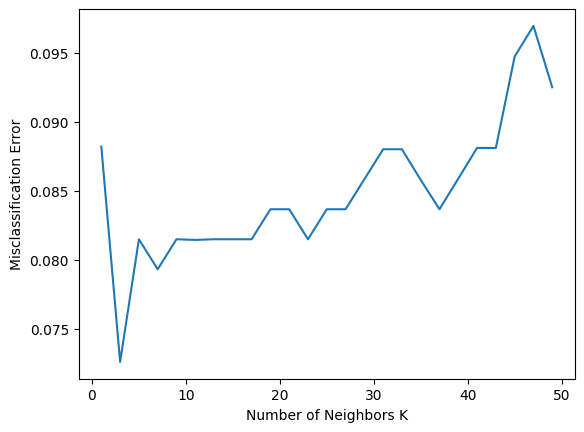

In [24]:
# Plot missclassification error versus k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

<Axes: ylabel='count'>

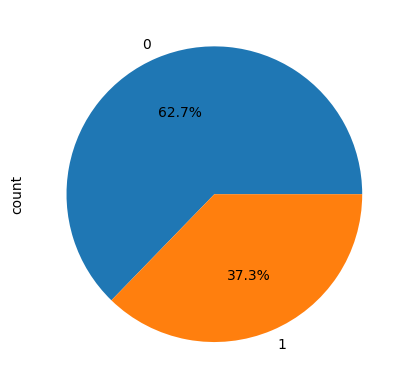

In [26]:
# Plot pie chart between '0' and '1' target variabel in diagnosis column
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [27]:
# Import, Build and train the GaussianNB Model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [28]:
# Make predictions on first 10 data values using gnb model
y_pred = gnb.predict(X_test)
y_pred[:10]

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [30]:
# Print accuracy of 'gnb' model.
print("Accuracy of the model is: ", gnb.score(X_test, y_test)*100)

Accuracy of the model is:  97.36842105263158
